<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/CNNVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 36.06 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [17]:
import matplotlib.pyplot as plt
from glob import glob

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

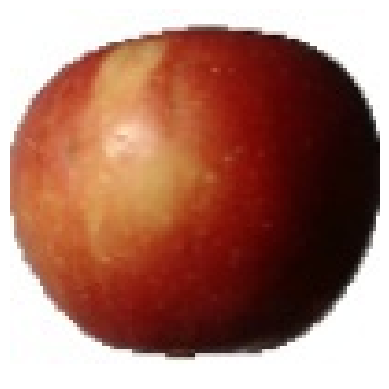

In [18]:
train_path = "../content/Fruit-Images-Dataset/Training"
test_path = "../content/Fruit-Images-Dataset/Test"
# a sample apple braeburn image

img = load_img(train_path + "/Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(100, 100, 3)

In [20]:
# how many classes are there in dataset?
classNames = glob(train_path + "/*")
numberOfClass = len(classNames)
print("The number of class:", numberOfClass)

The number of class: 131


In [21]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output layer
model.add(Activation("softmax"))

In [22]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [13]:
batch_size = 32

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [24]:
history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 60,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

<ipython-input-24-6cb85582f230>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


Epoch 1/60
50/50 [==============================] - 17s 109ms/step - loss: 4.7823 - accuracy: 0.0269 - val_loss: 4.4299 - val_accuracy: 0.0613
Epoch 2/60
50/50 [==============================] - 6s 118ms/step - loss: 4.1400 - accuracy: 0.0587 - val_loss: 3.5178 - val_accuracy: 0.1350
Epoch 3/60
50/50 [==============================] - 8s 160ms/step - loss: 3.4889 - accuracy: 0.1331 - val_loss: 3.1000 - val_accuracy: 0.2125
Epoch 4/60
50/50 [==============================] - 9s 178ms/step - loss: 2.9271 - accuracy: 0.2056 - val_loss: 2.3545 - val_accuracy: 0.3150
Epoch 5/60
50/50 [==============================] - 8s 153ms/step - loss: 2.4995 - accuracy: 0.3075 - val_loss: 1.8300 - val_accuracy: 0.4925
Epoch 6/60
50/50 [==============================] - 8s 154ms/step - loss: 2.1327 - accuracy: 0.3762 - val_loss: 1.7189 - val_accuracy: 0.5188
Epoch 7/60
50/50 [==============================] - 6s 124ms/step - loss: 1.8900 - accuracy: 0.4387 - val_loss: 1.3767 - val_accuracy: 0.6062
Epoch

In [ ]:
#Novo código/pular
history = model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=800 // batch_size
)

In [25]:
def save_model(fileName):
    model.save_weights(fileName + ".h5")

    import json
    with open(fileName + ".json", "w") as f:
        json.dump(history.history, f)

def load_json(fileName):
    import codecs
    import json
    with codecs.open(fileName + ".json", "r", encoding="utf-8") as f:
        h = json.loads(f.read())

    return h

# Descomente estas linhas para salvar e carregar o modelo
save_model("/content/test")
h = load_json("/content/test")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


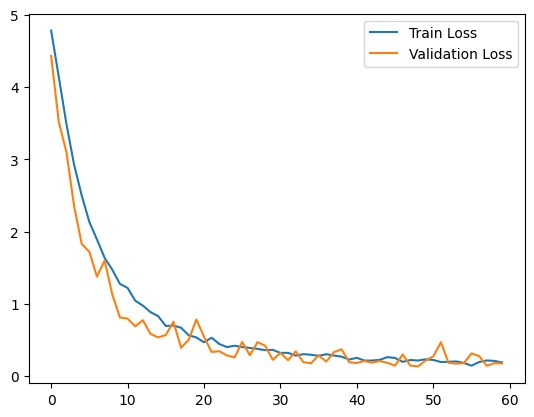

In [26]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

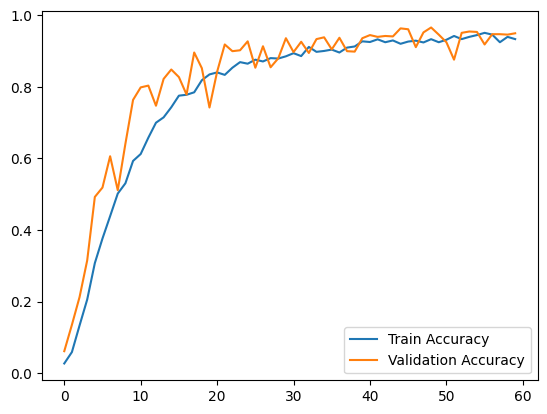

In [27]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [30]:
#acurácia é a quantidade de acertos do nosso modelo divido pelo total da amostra.

def acuracia (vp,vn,fp,fn):
    return (vp + vn) / (vp + vn+ fp + fn)

#precisão

def precisao (vp,vn,fp,fn):
    return vp / (vp + fp)

#revocação

def revocacao (vp,vn,fp,fn):
    return vp / (vp + fn)

#f1 score

def f1score (vp,vn,fp,fn):
    return 2 * ((precisao * revocacao)/(precisao + revocacao))

print(acuracia(25,40,10,25))

0.65


In [28]:
# import vgg16 model from keras library
from keras.applications.vgg16 import VGG16

vgg = VGG16()

553467096/553467096 [==============================] - 2s 0us/step


In [31]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
# all layers of vgg16
vgg_layer_list = vgg.layers
vgg_layer_list

In [33]:
# drop last dense layer that has 1000 class-prediction layers
model = Sequential()
for i in range(len(vgg_layer_list)-3):
    model.add(vgg_layer_list[i])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [34]:
# freeze layers
for layers in model.layers:
    layers.trainable = False

model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))

# adding last layer as a trainable layer
model.add(Dense(numberOfClass, activation = "softmax"))
# last model's summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [35]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [36]:
# re-generate images with (224, 224) target size
train_generator = train_datagen.flow_from_directory(train_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 60,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


<ipython-input-36-23c6027d6d85>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_generator,


Epoch 1/60
50/50 [==============================] - 32s 513ms/step - loss: 10.6637 - accuracy: 0.0181 - val_loss: 4.6309 - val_accuracy: 0.0162
Epoch 2/60
50/50 [==============================] - 25s 509ms/step - loss: 4.4692 - accuracy: 0.0450 - val_loss: 4.0582 - val_accuracy: 0.0850
Epoch 3/60
50/50 [==============================] - 23s 468ms/step - loss: 3.9691 - accuracy: 0.0831 - val_loss: 3.6785 - val_accuracy: 0.1213
Epoch 4/60
50/50 [==============================] - 25s 505ms/step - loss: 3.5089 - accuracy: 0.1500 - val_loss: 3.7517 - val_accuracy: 0.1050
Epoch 5/60
50/50 [==============================] - 25s 500ms/step - loss: 3.0331 - accuracy: 0.2169 - val_loss: 3.5245 - val_accuracy: 0.1912
Epoch 6/60
50/50 [==============================] - 28s 558ms/step - loss: 2.5857 - accuracy: 0.2919 - val_loss: 2.8356 - val_accuracy: 0.2875
Epoch 7/60
50/50 [==============================] - 24s 478ms/step - loss: 2.3144 - accuracy: 0.3669 - val_loss: 1.7862 - val_accuracy: 0.492

In [ ]:
#novo modelo/pular
history = model.fit(
    x=train_generator,
    steps_per_epoch=1600 // batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=800 // batch_size
)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


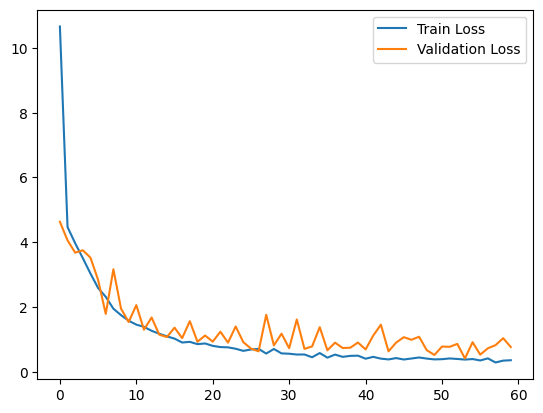

In [37]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

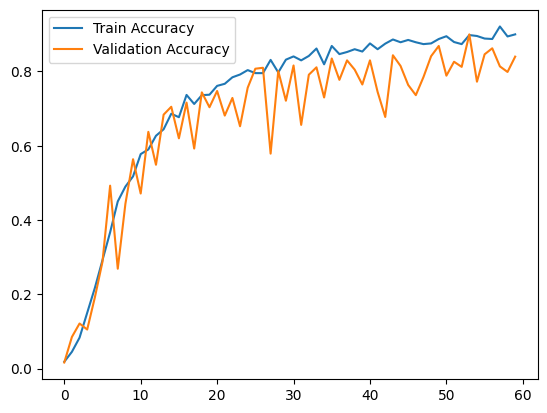

In [38]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [39]:
#acurácia é a quantidade de acertos do nosso modelo divido pelo total da amostra.

def acuracia (vp,vn,fp,fn):
    return (vp + vn) / (vp + vn+ fp + fn)

#precisão

def precisao (vp,vn,fp,fn):
    return vp / (vp + fp)

#revocação

def revocacao (vp,vn,fp,fn):
    return vp / (vp + fn)

#f1 score

def f1score (vp,vn,fp,fn):
    return 2 * ((precisao * revocacao)/(precisao + revocacao))

print(acuracia(25,40,10,25))

0.65
